# Codecademy independent Python project

# U.S. Medical Insurance Costs

#### Questions for analysis:

1. Find out the average age of the patients in the dataset.
2. Analyze where a majority of the individuals are from.
3. Look at the different costs between smokers vs. non-smokers.
4. Figure out what the average age is for someone who has at least one child in this dataset. 

In [122]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


### Find out the average age of the patients in the dataset.

In [6]:
average_age = df['age'].mean()

In [7]:
print(average_age)

39.20702541106129


In [10]:
round(average_age)

39

### Analyze where a majority of the individuals are from.

In [11]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

### Look at the different costs between smokers vs. non-smokers.

In [23]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [25]:
# again the total number of obs in the smoker column is
df.smoker.count()

1338

In [36]:
# let's summarise the stats for non-smokers and smokers

df.groupby(['smoker']).count()

,age,sex,bmi,children,region,charges
smoker,,,,,,
no,1064,1064,1064,1064,1064,1064
yes,274,274,274,274,274,274


In [42]:
df.groupby(['smoker'])['charges'].agg('mean')

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

#### Plot the different charges

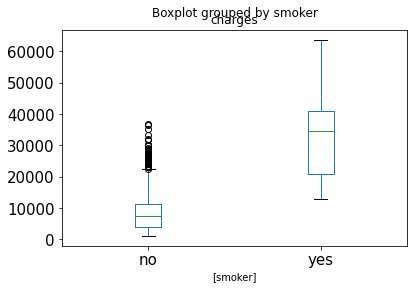

In [68]:
boxplot = df.boxplot(column = ['charges'],
          by = ['smoker'] , 
          fontsize = 15, 
          grid = False)

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
import seaborn as sns


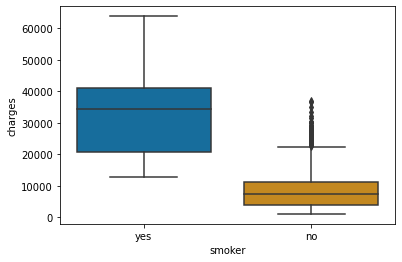

In [65]:
sns.boxplot(y = 'charges', x = 'smoker', 
                 data = df, 
                 palette = "colorblind")

## Is there a relationship between smoking and higher bmi? 

In [124]:
# let's slice the data
# slice specific columns? 
data = df.iloc[:, 0:7]
data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [140]:
# drop columns

data2 = data.drop(['sex','region','children'], axis=1)
data2

,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520
...,...,...,...,...
1333,50,30.970,no,10600.54830
1334,18,31.920,no,2205.98080
1335,18,36.850,no,1629.83350
1336,21,25.800,no,2007.94500


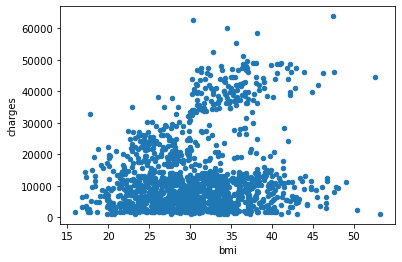

In [141]:
# now let's graph bmi and charges

data2.plot.scatter(x = 'bmi', y = 'charges')


In [135]:
# it looks like there could be a positive linear trend

### Linear Regression – using numpy + polyfit


In [168]:
# creating a linear regression using numpy and polyfit

In [169]:
x = data2.bmi
y = data2.charges

In [170]:
model = np.polyfit(x, y, 1)
model

array([ 393.8730308 , 1192.93720896])

In [171]:
# the first figure is the coefficient, the second is the intercept.
# poly1d() method – to estimate unknown values 

predict = np.poly1d(model)

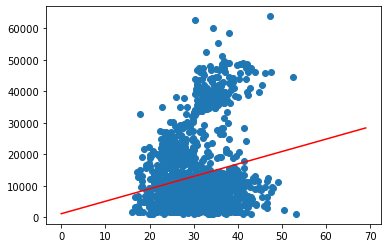

In [173]:
# then plot the regression

x_lin_reg = range(0, 70)
y_lin_reg = predict(x_lin_reg)

plt.scatter(x, y)                         #plot the original dataset
plt.plot(x_lin_reg, y_lin_reg, c = 'r')   #add the regression line

In [161]:
# calculate the accuracy of the model - Rsquared

from sklearn.metrics import r2_score
r2_score(y, predict(x))

# this is not a great model

0.03933913991786253

### Figure out what the average age is for someone who has at least one child in this dataset.

In [179]:
display(data.loc[(data.children >= 1)])

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1332,52,female,44.700,3,no,southwest,11411.68500


In [184]:
data.groupby(data.children >= 1).mean()

,age,bmi,children,charges
children,,,,
False,38.444251,30.550296,0.000000,12365.975602
True,39.780105,30.748370,1.917539,13949.941093


In [185]:
# the average age is 39.8.